
# libraries needed 

In [153]:
#!pip install nltk
#!pip install seaborn   # used for virtualization
#!pip install wordcloud
#!pip install gensim    # converting data into features 

# import libraries

In [154]:
import re               #for regular expressions
import nltk             #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Some Options

In [155]:
pd.set_option("display.max_colwidth",200) # makes the maximim column width equal to 200 unit for displaying the dataset
warnings.filterwarnings("ignore",category=DeprecationWarning) # ignore any deprecated features in dataset
%matplotlib inline  
#magic function display inline in jupyter instead of being displayed in another windows

# Reading Data

In [156]:
train = pd.read_csv('train.csv') # read .csv training dataset
test = pd.read_csv('test.csv')   # read .csv test dataset

In [157]:
train[train['label'] == 1].head(10)  # display racist train dataset (first 10 rows) 

id  label  \
13    14      1   
14    15      1   
17    18      1   
23    24      1   
34    35      1   
56    57      1   
68    69      1   
77    78      1   
82    83      1   
111  112      1   

                                                                                                                                 tweet  
13                                                          @user #cnn calls #michigan middle school 'build the wall' chant '' #tcot    
14                               no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins  
17                                                                                                              retweet if you agree!   
23                                                                                     @user @user lumpy says i am a . prove it lumpy.  
34                            it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia   
56                                                                                             @user lets fight against  #love #peace   
68                      ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness    
77                                             @user hey, white people: you can call people 'white' by @user  #race  #identity #medâ¦  
82                                                       how the #altright uses  &amp; insecurity to lure men into #whitesupremacy      
111  @user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦

In [158]:
train[train['label'] == 0].head(10)  # display non-racist train dataset (first 10 rows) [غير عنصري]

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      0   
5   6      0   
6   7      0   
7   8      0   
8   9      0   
9  10      0   

                                                                                                                                             tweet  
0                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                                              bihday your majesty  
3                                                           #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                                           factsguide: society now    #motivation  
5                             [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    
6                                                                        @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦  
7  the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl  
8                                                          we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦   
9                                                                                                @user @user welcome here !  i'm   it's so #gr8 !

In [159]:
print (train.shape)
print (test.shape)

(31962, 3)
(17197, 2)


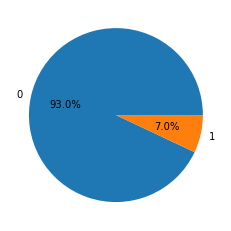

In [160]:
plt.pie(train['label'].value_counts(),labels=['0','1'],autopct='%1.1f%%')
plt.show()

In [161]:
train['label'].value_counts() # counts the number of non-racist rocords which has value of [0] and 
# number of racist records which has value of [1]

0    29720
1     2242
Name: label, dtype: int64

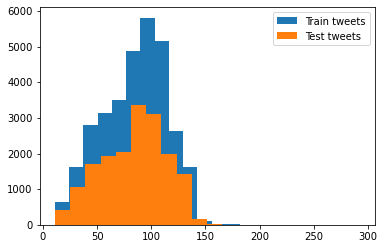

In [162]:
length_train_dataset = train['tweet'].str.len() # length of characters of every tweet in train dataset tweets
length_test_dataset = test['tweet'].str.len()   # length of characters of every tweet in test dataset tweets

plt.hist(length_train_dataset, bins=20, label="Train tweets") # create histogram for train tweets with possible 20 columns
plt.hist(length_test_dataset, bins=20, label="Test tweets")   # create histogram for test tweets with possible 20 columns
plt.legend() # make two different colors for two datasets
plt.show()
# x-axis represnts number of characters in every tweet
# y-axis represents number of tweets represent that number of characters

# concatnating data

In [163]:
combine = pd.concat([train,test],ignore_index=True) # combine train and test datasets into one dataset called (combine) And ignore index
combine.shape # display (rows,columns) for combine dataset


(49159, 3)

# define function to remove specific pattern

In [164]:
def remove_pattern(input_text,pattern):
    r = re.findall(pattern, input_text) 
    # store in (r) every thing in input_text that match the pattern
    # information about findall() method => https://www.w3schools.com/python/python_regex.asp#findall
    for i in r:
        input_text = re.sub(i,'',input_text)
        # replace every word => [i] with '' to remove it from dataset 
        # view information about sub() method
    return input_text


# removing twitter handle

In [165]:
combine['raw_tweet'] = np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*") # w-> set of chars \ -> sepcial sequence # any number of occurrences
# remove any (@) followed by any number of charachers until space 
# (like this tweet: ( @ahmed I am happy ), it results into => ( I am happy) )
# and store it in column called 'tidy_tweet'
# we used vectorize (loop alternative) because if there many objects (it is not single tweet)
combine.head() # display first 5 records

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                                                                          raw_tweet  
0                   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1    thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                               bihday your majesty  
3                            #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                            factsguide: society now    #motivation

# removing links

In [166]:
combine['raw_tweet'] = np.vectorize(remove_pattern)(combine['raw_tweet'],r"http?:\/\/S+") # w-> set of chars \ -> sepcial sequence # any number of occurrences
combine.head() # display first 5 records

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                                                                          raw_tweet  
0                   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1    thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                               bihday your majesty  
3                            #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                            factsguide: society now    #motivation

# replace any sequence except ( a-z ) ( A-Z ) ( # ) 

In [167]:
combine['raw_tweet'] = combine['raw_tweet'].str.replace("[^a-zA-Z#]"," ",regex=True)
# This replace any sequence of character EXCEPT (A-Z) or (a-z) or # to white space
# like (!?&^ahmed) => (ahmed) 
combine.head(10) # display first 10 records

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   
5   6    0.0   
6   7    0.0   
7   8    0.0   
8   9    0.0   
9  10    0.0   

                                                                                                                                             tweet  \
0                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                                              bihday your majesty   
3                                                           #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                                           factsguide: society now    #motivation   
5                             [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo     
6                                                                        @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦   
7  the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl   
8                                                          we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦    
9                                                                                                @user @user welcome here !  i'm   it's so #gr8 !    

                                                                                                                                         raw_tweet  
0                                                  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run  
1                                   thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked  
2                                                                                                                              bihday your majesty  
3                                                           #model   i love u take with u all the time in ur                                        
4                                                                                                           factsguide  society now    #motivation  
5                                   huge fan fare and big talking before they leave  chaos and pay disputes when they get there  #allshowandnogo    
6                                                                                                                 camping tomorrow        danny     
7  the next school year is the year for exams      can t think about that      #school #exams   #hate #imagine #actorslife #revolutionschool #girl  
8                                                          we won    love the land    #allin #cavs #champions #cleveland #clevelandcavaliers        
9                                                                                                            welcome here    i m   it s so #gr

# removing stopwords

# first method ( not efficent )

In [168]:
#combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x : ' '.join([w for w in x.split() if len(w) > 3]))
# first it joins words in the tweet an separate them with space
# but while joining it applies a restrction to prevent words that have length less than 4 to joined  
# removing words which length is 3 or less
# read about lambda function in python https://www.w3schools.com/python/python_lambda.asp
#combine.head(10)

# removing stopwords second method (better)

In [169]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

 
def remove_stopwords(tweets):
    all_tweets=[]              # to carry all no_stopwords tweets 
    for tweet in tweets:
        no_sw_list=[]          # to carry all non_stopwords on the tweet 
        for word in tweet.split():  # spliting the tweet 
            if word.lower() not in stopwords: # comparing words on the tweet to words on english stopwords 
                 no_sw_list.append(word) # adding non_stopwords in the tweet to no_sw_list 
        all_tweets.append(' '.join(no_sw_list)) # adding the tweet( after removing stopwords ) to the tweets array 
    return   all_tweets



In [170]:
tweets=combine['raw_tweet']
combine['raw_tweet']=remove_stopwords(tweets) 
combine.head(10)

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   
5   6    0.0   
6   7    0.0   
7   8    0.0   
8   9    0.0   
9  10    0.0   

                                                                                                                                             tweet  \
0                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                                              bihday your majesty   
3                                                           #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                                           factsguide: society now    #motivation   
5                             [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo     
6                                                                        @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦   
7  the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl   
8                                                          we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦    
9                                                                                                @user @user welcome here !  i'm   it's so #gr8 !    

                                                                                             raw_tweet  
0                                             father dysfunctional selfish drags kids dysfunction #run  
1                     thanks #lyft credit use cause offer wheelchair vans pdx #disapointed #getthanked  
2                                                                                       bihday majesty  
3                                                                         #model love u take u time ur  
4                                                                       factsguide society #motivation  
5                               huge fan fare big talking leave chaos pay disputes get #allshowandnogo  
6                                                                               camping tomorrow danny  
7  next school year year exams think #school #exams #hate #imagine #actorslife #revolutionschool #girl  
8                                     love land #allin #cavs #champions #cleveland #clevelandcavaliers  
9                                                                                          welcome #gr

In [171]:
# tokenise means that [bihday your majesty] => [bihday , your , majesty]
tokenized_tweet = combine['raw_tweet'].apply(lambda x : x.split()) # tokenise the words
tokenized_tweet.head(10)

0                                                     [father, dysfunctional, selfish, drags, kids, dysfunction, #run]
1                         [thanks, #lyft, credit, use, cause, offer, wheelchair, vans, pdx, #disapointed, #getthanked]
2                                                                                                    [bihday, majesty]
3                                                                                 [#model, love, u, take, u, time, ur]
4                                                                                   [factsguide, society, #motivation]
5                                   [huge, fan, fare, big, talking, leave, chaos, pay, disputes, get, #allshowandnogo]
6                                                                                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, #school, #exams, #hate, #imagine, #actorslife, #revolutionschool, #girl]
8                                             [l

# stem all words like (kids to kid) (society to societi)

In [172]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
# apply stemming process to all words on each x (tweet)
tokenized_tweet

0                                                                              [father, dysfunct, selfish, drag, kid, dysfunct, #run]
1                                               [thank, #lyft, credit, use, caus, offer, wheelchair, van, pdx, #disapoint, #getthank]
2                                                                                                                   [bihday, majesti]
3                                                                                                [#model, love, u, take, u, time, ur]
4                                                                                                        [factsguid, societi, #motiv]
                                                                     ...                                                             
49154                              [thought, factori, left, right, polaris, #trump, #uselect, #leadership, #polit, #brexit, #blm, gt]
49155                                           [feel, like, m

# now let's combine these tokens back

In [173]:

#  like [bihday, your, majesti] => [bihday your majesti]
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
# for each token set(i) join all tokens back again 
combine['raw_tweet'] = tokenized_tweet
combine.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                                   raw_tweet  
0                             father dysfunct selfish drag kid dysfunct #run  
1  thank #lyft credit use caus offer wheelchair van pdx #disapoint #getthank  
2                                                             bihday majesti  
3                                               #model love u take u time ur  
4                                                   factsguid societi #motiv

# Creating word cloud for only visualization

In [174]:
#all_words = ' '.join([text for text in combine['tidy_tweet']]) # combine all tweets separated by space 
#from wordcloud import WordCloud
#wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words) # draw wordcloud
#plt.figure(figsize=(10,7))  # figure dimentions 
#plt.imshow(wordcloud, interpolation="bilinear")
# pixels interpolation 
# about interpolation ->> https://matplotlib.org/3.5.0/gallery/images_contours_and_fields/interpolation_methods.html 
#plt.axis('off') # disable axis
#plt.show()

In [175]:
#non-rasist
#normal_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
#wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
#plt.figure(figsize=(10,7))
#plt.imshow(wordcloud,interpolation='bilinear')
#plt.axis('off')
#plt.show()

In [176]:
#rasist tweet
#negative_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==1]])
#wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
#plt.figure(figsize=(10,7))
#plt.imshow(wordcloud,interpolation='bilinear')
#plt.axis('off')
#plt.show()

In [177]:
# collect hashtags
def hashtag_extract(tweets):
    hashtag_list = []
    for tweet in tweets: # loop over words contained in tweet
        ht = re.findall(r"#(\w+)",tweet) # find a pattern that begins with hash sign (#) until finding a space
        hashtag_list.append(ht) # append hashtags to (hashtags) list
    return hashtag_list


In [178]:
# extracting hashtags from non racist tweets
hash_regular=hashtag_extract(combine['raw_tweet'][combine['label']==0])
hash_regular=sum(hash_regular,[]) # list of all non racist hashtags

# extracting hashtags from racist tweets
hash_racist=hashtag_extract(combine['raw_tweet'][combine['label']==1])
hash_racist=sum(hash_racist,[])# list of all racist hashtags


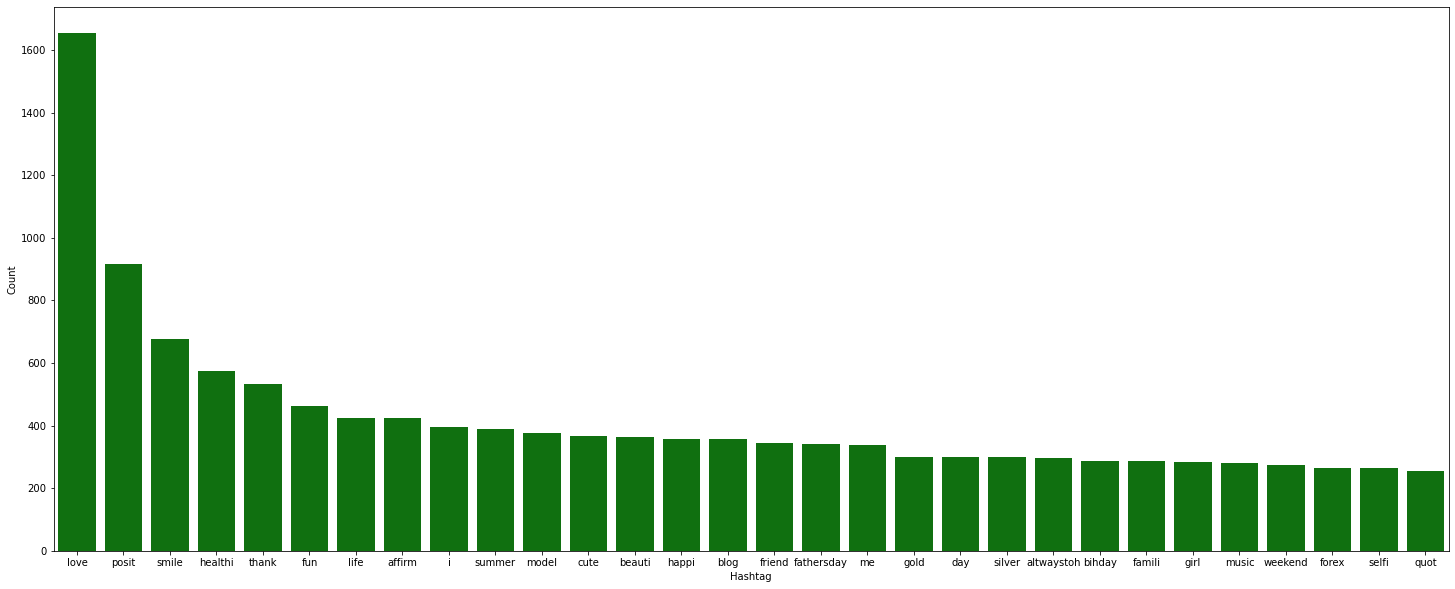

In [179]:
# non-racist tweets

non_racist_tweets = nltk.FreqDist(hash_regular)
# non_racist_tweets.keys() are hashtags 
# non_racist_tweets.values() are frequency of hashtags
df1 = pd.DataFrame({'Hashtag': list(non_racist_tweets.keys()), 'Count': list(non_racist_tweets.values())})
# creat a data fram of two columns representing each hashtag with its freq 

# selecting top 30 most frequent hashtags
df1 = df1.nlargest(columns="Count",n=30) # number of columns in figure
plt.figure(figsize=(25,10)) # size of figure
ax = sns.barplot(data=df1, x="Hashtag", y="Count",color="green") # determine a-axis and y-axis
plt.show()

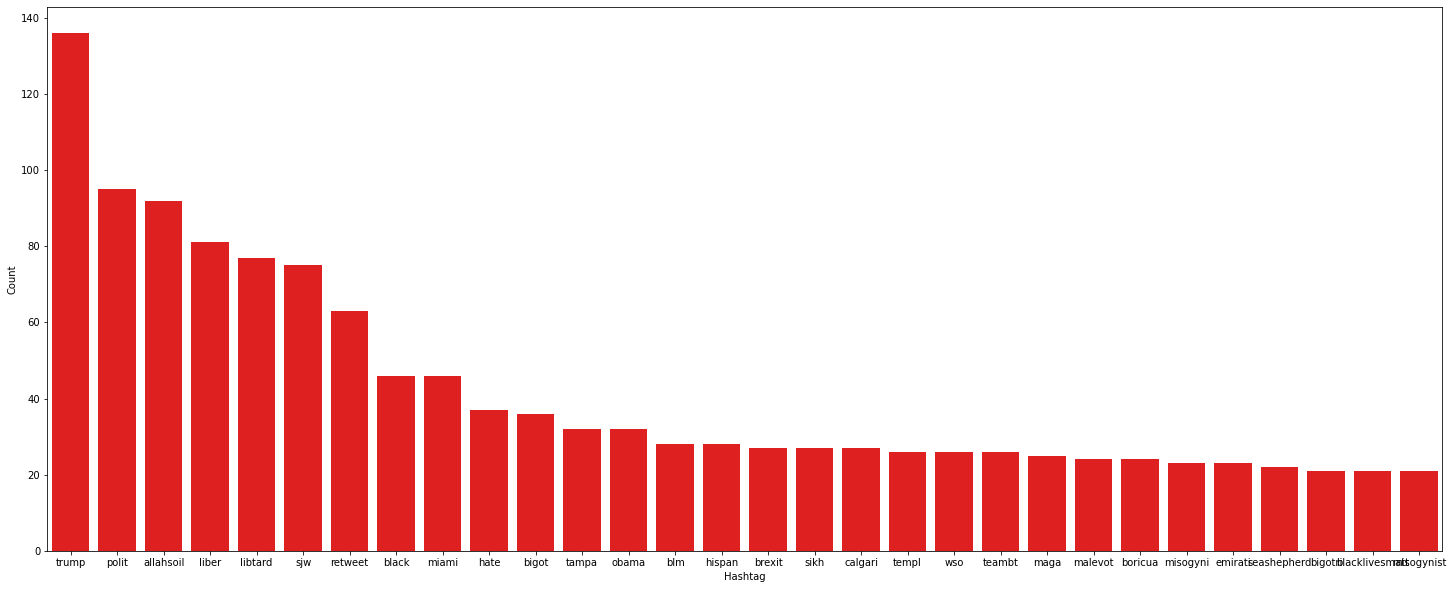

In [180]:
#racist tweets

racist_tweets = nltk.FreqDist(hash_racist)
# racist_tweets.keys() are hashtags 
# racist_tweets.values() are frequency of hashtags
df2 = pd.DataFrame({'Hashtag': list(racist_tweets.keys()),'Count': list(racist_tweets.values())}) #count number of occurrence of particular word

#selecting top 30 frequent  hashtas
df2 = df2.nlargest(columns = "Count",n=30) # number of columns in figure
plt.figure(figsize=(25,10)) # size of figure
ax = sns.barplot(data=df2, x="Hashtag",y="Count",color="red") # determine a-axis and y-axis
plt.show()

In [181]:
# extract features from data

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

In [183]:
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)
# ignore terms that appear in more than 90% of documents and ignore terms that appear in less than 2 documents
bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english') 
# build matrix and vocabloary

bow = bow_vectorizer.fit_transform(combine['raw_tweet']) # tokenize and build vocabulary
# for more information https://www.geeksforgeeks.org/python-ways-to-sum-list-of-lists-and-return-sum-list/
# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
bow.shape

(49159, 1000)

# replace null values with 0

In [184]:

combine=combine.fillna(0) #replace all null values by 0
combine.head(10)

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   
5   6    0.0   
6   7    0.0   
7   8    0.0   
8   9    0.0   
9  10    0.0   

                                                                                                                                             tweet  \
0                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                                              bihday your majesty   
3                                                           #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                                           factsguide: society now    #motivation   
5                             [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo     
6                                                                        @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦   
7  the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl   
8                                                          we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦    
9                                                                                                @user @user welcome here !  i'm   it's so #gr8 !    

                                                                                         raw_tweet  
0                                                   father dysfunct selfish drag kid dysfunct #run  
1                        thank #lyft credit use caus offer wheelchair van pdx #disapoint #getthank  
2                                                                                   bihday majesti  
3                                                                     #model love u take u time ur  
4                                                                         factsguid societi #motiv  
5                                  huge fan fare big talk leav chao pay disput get #allshowandnogo  
6                                                                              camp tomorrow danni  
7  next school year year exam think #school #exam #hate #imagin #actorslif #revolutionschool #girl  
8                                      love land #allin #cav #champion #cleveland #clevelandcavali  
9                                                                                       welcom #gr

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['label'],
                                                    test_size=0.2, random_state=69)

In [186]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (39327, 1000)
X_test_shape :  (9832, 1000)
y_train_shape :  (39327,)
y_test_shape :  (9832,)


In [187]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

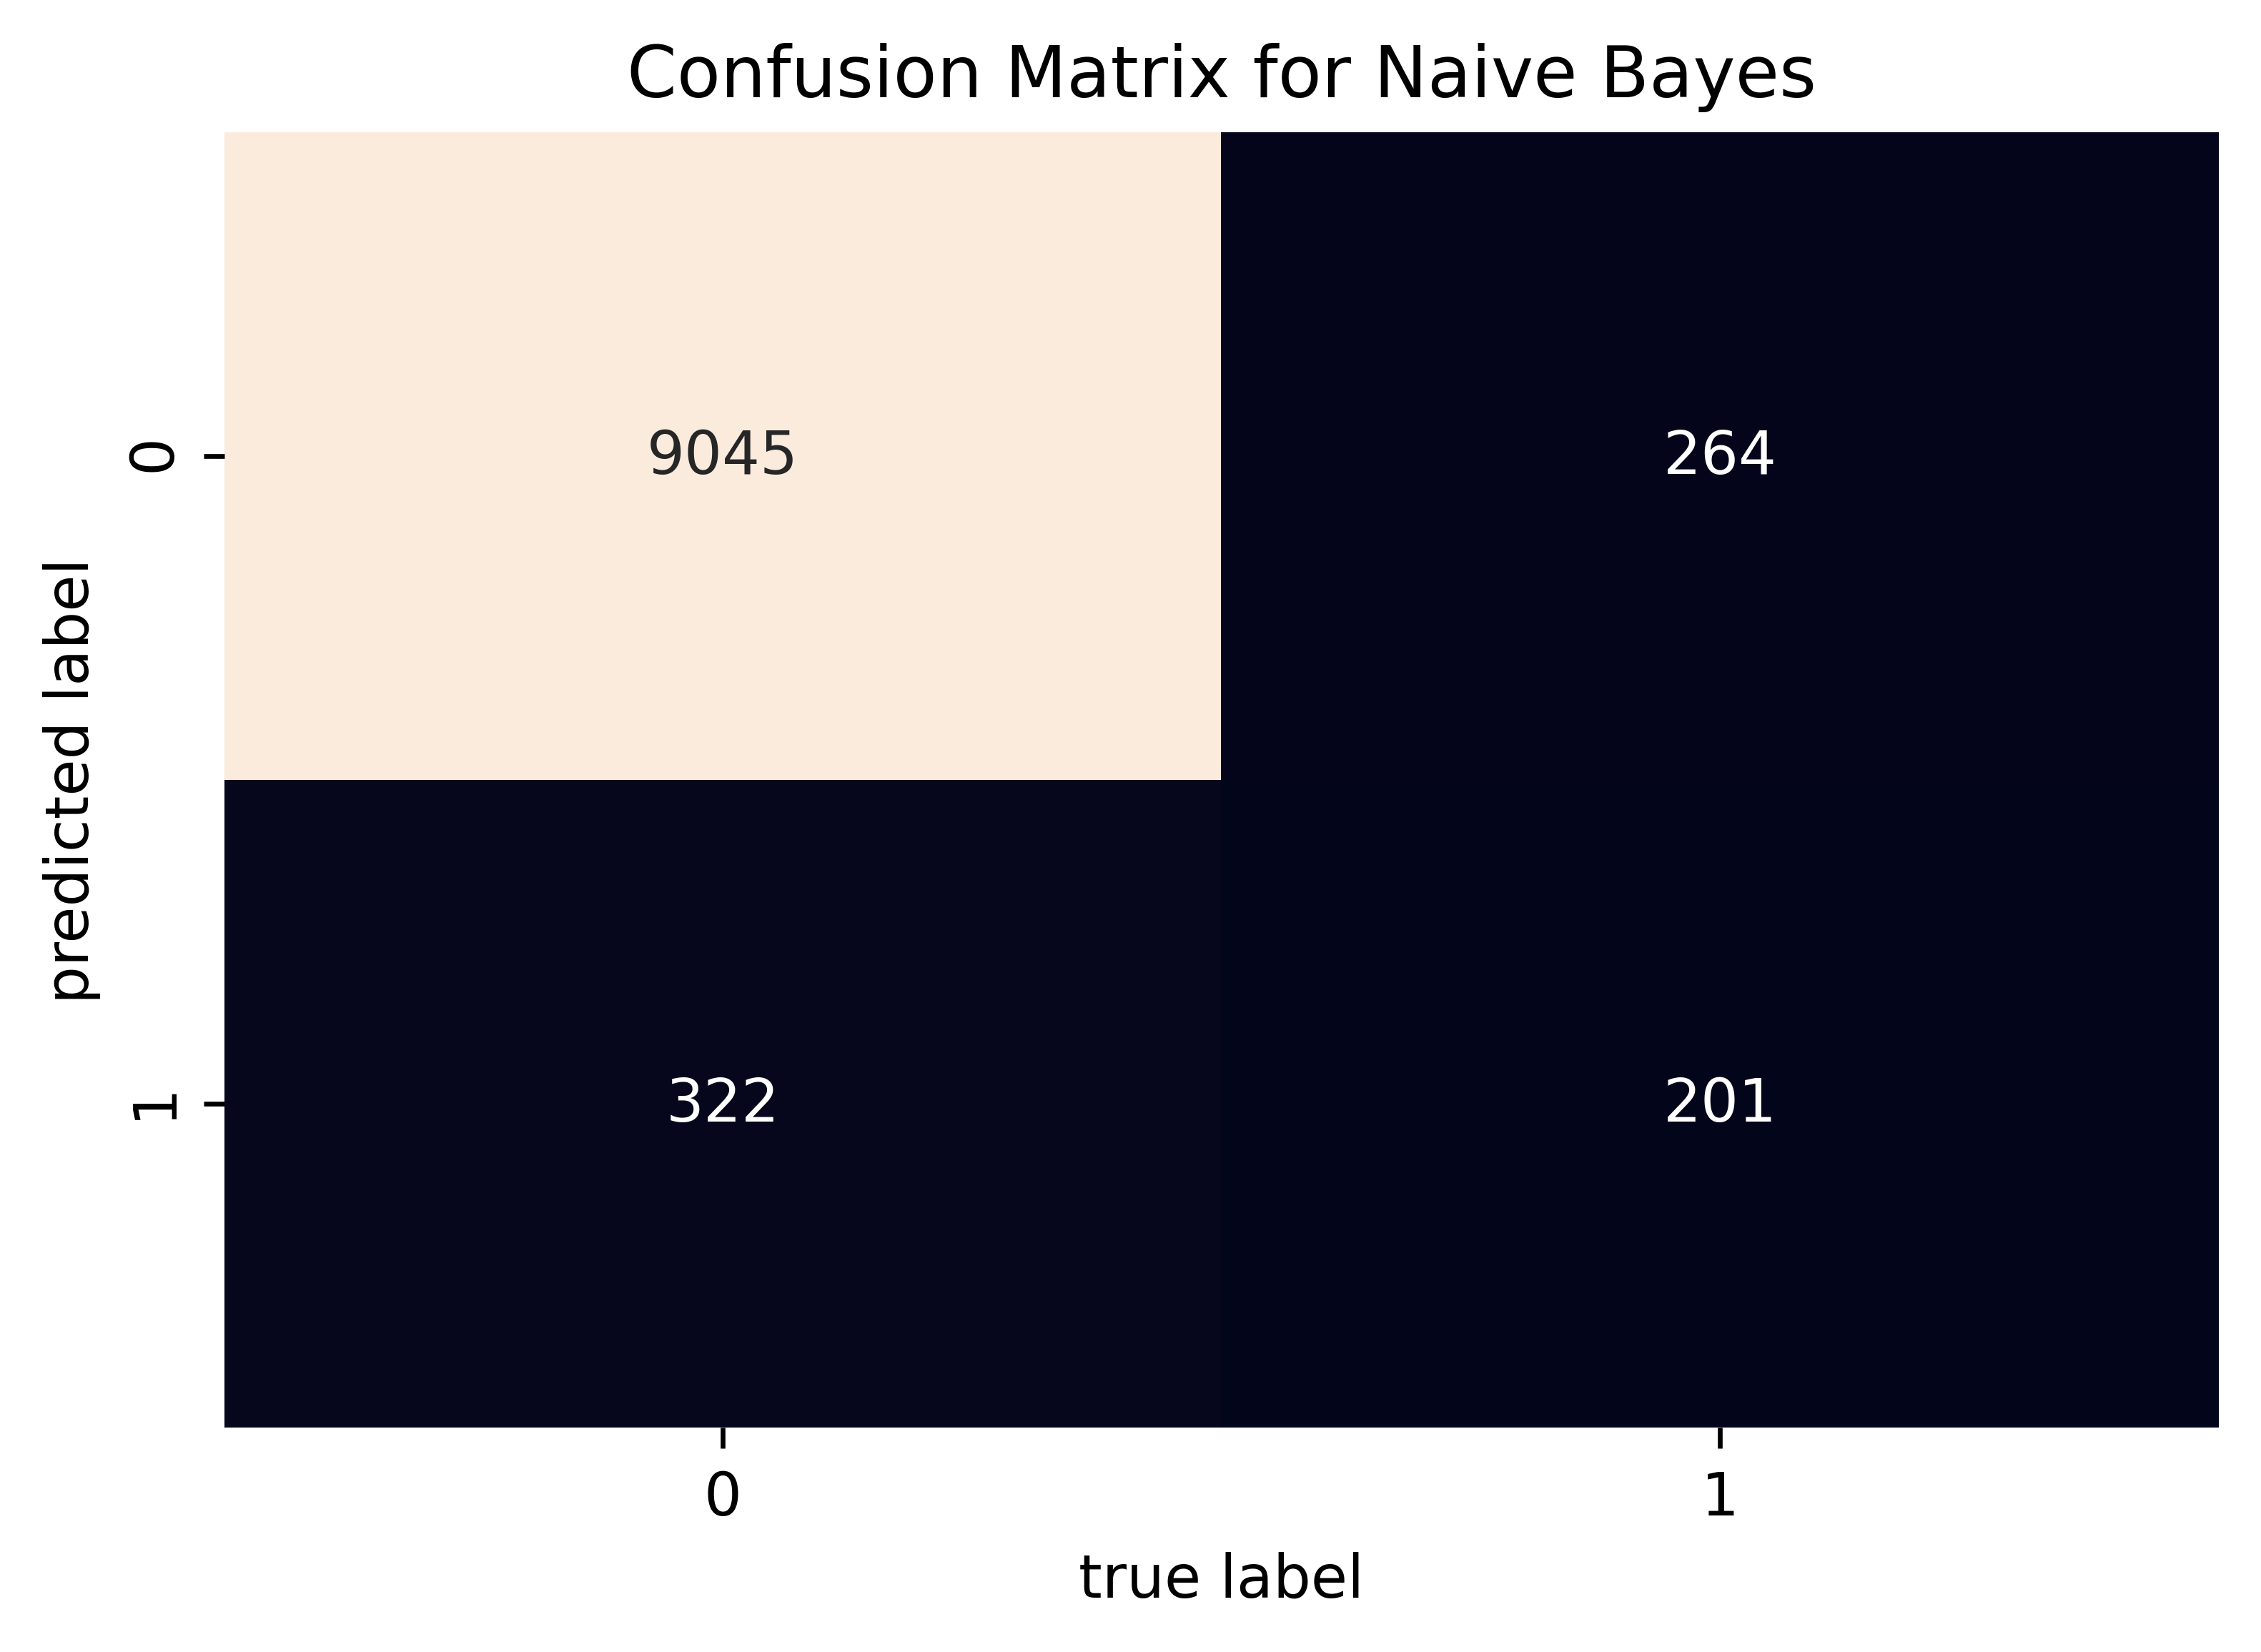

{0.0: 9309, 1.0: 523}

In [188]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

type(predicted_naive)
unique, counts = np.unique(predicted_naive, return_counts=True)
dict(zip(unique, counts))

In [189]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9403986981285598
